# Predict ChemProp Model
Now that we have a model and determined it's Mean Absolute Error,

Let's see how this model with do with similar compound structure of RTX!

RTX SMILE:

C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(O)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2

**Switch to a GPU environment**

In [32]:
!pip install chemprop

### Below is the output from Claude AI in which I ask it to generate 5 similar compounds of RTX.
**This is not an optimal way of testing this model, but for the sake of quick test let's go with it!**

I'll create 5 novel SMILES that are structurally similar to your compound, which appears to be a complex polycyclic natural product with multiple stereocenters, a benzyl group, and a phenolic ester moiety.

Here are 5 similar novel SMILES:

1. **Modified ester substituent (para-methoxy instead of meta):**
```
C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(O)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2
```
Changed to:
```
C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(OC)c(O)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2
```

2. **Fluorinated benzyl group:**
```
C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccc(F)cc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(O)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2
```

3. **Extended methyl to ethyl on isopropenyl group:**
```
C=C(CC)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(O)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2
```

4. **Dimethoxy aromatic ester:**
```
C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(OC)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2
```

5. **Naphthyl instead of phenyl on ester:**
```
C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc2ccccc2c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2
```

These modifications include:
- Positional isomers of substituents
- Halogenation
- Alkyl chain extensions
- Additional methoxy groups
- Ring expansions (phenyl → naphthyl)

All maintain the core polycyclic scaffold and stereochemistry while introducing structural diversity that could alter biological activity or physicochemical properties.

In [33]:
!pip install rdkit

In [34]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import CanonSmiles as canonicalize_smiles


RTX Structure:


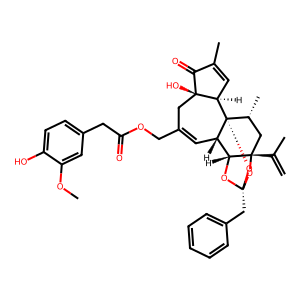


Novel compounds generated by Claude AI


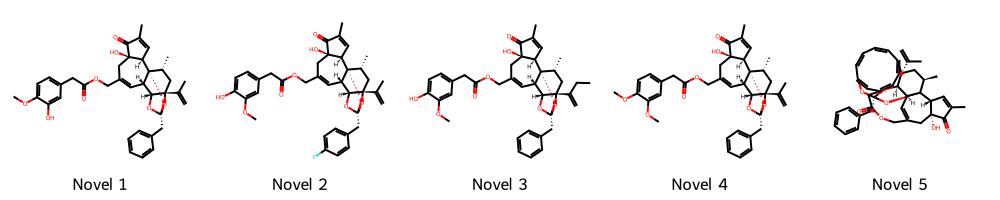

In [76]:
# Let's visualized these AI generated structures along with RTX

# Define the SMILES string for the molecule
rtx = "C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(O)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2"

# Convert the SMILES string to an RDKit molecule object
rtx_mol = Chem.MolFromSmiles(rtx)
rtx_img = Draw.MolToImage(rtx_mol)
print("RTX Structure:")
display(rtx_img)

nov_mols = [
    'C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(OC)c(O)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2',
    'C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccc(F)cc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(O)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2',
    'C=C(CC)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(O)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2',
    'C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc(OC)c(OC)c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2',
    'C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(O[C@@H]1[C@@H]3C=C(COC(=O)Cc1ccc2ccccc2c1)C[C@]1(O)C(=O)C(C)=C[C@@H]41)O2',
    'O=C(C[C@@H](O)CCCCC)CCc1cc(OC)c(O)cc1', # 6-Gingerol
    'OC1=C(OC)C=C(CCC(/C=C/CCCCC)=O)C=C1', # 6-Shogaol
    'C1CCN(CC1)C(=O)/C=C/C=C/C2=CC3=C(C=C2)OCO3', # Piperine
    'CC(C)/C=C/CCCCC(=O)NCC1=CC(=C(C=C1)O)OC', # Capsaicin
    'CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O', # CBD
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', # this is caffiene
]

mols = [Chem.MolFromSmiles(s) for s in nov_mols[:5]]

legends = [
    "Novel 1",
    "Novel 2",
    "Novel 3",
    "Novel 4",
    "Novel 5",
]
print("\nNovel compounds generated by Claude AI")
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=legends)

In [37]:
from chemprop.models.utils import load_model
from chemprop.models.model import MPNN
from chemprop import data, featurizers, models

import pandas as pd
import numpy as np
import torch
from lightning import pytorch as pl
from pathlib import Path

# Let's start predicting with these 5 novel compounds!

As well as 6 known compounds

In [38]:
checkpoint_path = '/content/drive/MyDrive/Colab_Notebooks/TRPV1-drug-discovery-research/best.ckpt'
mpnn = MPNN.load_from_checkpoint(checkpoint_path)
mpnn

MPNN(
  (message_passing): BondMessagePassing(
    (W_i): Linear(in_features=86, out_features=300, bias=False)
    (W_h): Linear(in_features=300, out_features=300, bias=False)
    (W_o): Linear(in_features=372, out_features=300, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
    (tau): ReLU()
    (V_d_transform): Identity()
    (graph_transform): Identity()
  )
  (agg): MeanAggregation()
  (bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (predictor): RegressionFFN(
    (ffn): MLP(
      (0): Sequential(
        (0): Linear(in_features=300, out_features=300, bias=True)
      )
      (1): Sequential(
        (0): ReLU()
        (1): Dropout(p=0.0, inplace=False)
        (2): Linear(in_features=300, out_features=1, bias=True)
      )
    )
    (criterion): MSE(task_weights=[[1.0]])
    (output_transform): UnscaleTransform()
  )
  (X_d_transform): Identity()
  (metrics): ModuleList(
    (0): RMSE(task_weights=[[1.0]])
    (1): MAE(task_weigh

In [39]:
test_data = [data.MoleculeDatapoint.from_smi(smi) for smi in nov_mols]

In [40]:
featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()
test_dset = data.MoleculeDataset(test_data, featurizer=featurizer)
test_loader = data.build_dataloader(test_dset, shuffle=False)

In [41]:
with torch.inference_mode():
    trainer = pl.Trainer(
        logger=None,
        enable_progress_bar=True,
        accelerator="cuda",
        devices=1
    )
    test_preds = trainer.predict(mpnn, test_loader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: 💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/saving.py:365: Skipping 'metrics' parameter because it is not possible to safely dump to YAML.


In [44]:
nov_mols_dict = {
        'compound_name': [
        'novel_1',
        'novel_2',
        'novel_3',
        'novel_4',
        'novel_5',
        'Gingerol',
        'Shogaol',
        'Piperine',
        'Capsaicin',
        'CBD',
        'Caffiene',
    ],
    'SMILES': nov_mols,
}

nov_mols_df = pd.DataFrame(nov_mols_dict)
nov_mols_df

,compound_name,SMILES
0,novel_1,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(...
1,novel_2,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccc(F)cc...
2,novel_3,C=C(CC)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)...
3,novel_4,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(...
4,novel_5,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(...
5,Gingerol,O=C(C[C@@H](O)CCCCC)CCc1cc(OC)c(O)cc1
6,Shogaol,OC1=C(OC)C=C(CCC(/C=C/CCCCC)=O)C=C1
7,Piperine,C1CCN(CC1)C(=O)/C=C/C=C/C2=CC3=C(C=C2)OCO3
8,Capsaicin,CC(C)/C=C/CCCCC(=O)NCC1=CC(=C(C=C1)O)OC
9,CBD,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O


In [45]:
test_preds = np.concatenate(test_preds, axis=0)
nov_mols_df['pred'] = test_preds
nov_mols_df

,compound_name,SMILES,pred
0,novel_1,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(...,8.963371
1,novel_2,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccc(F)cc...,8.709142
2,novel_3,C=C(CC)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)...,8.857159
3,novel_4,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(...,8.705970
4,novel_5,C=C(C)[C@]12C[C@@H](C)[C@@]34O[C@](Cc5ccccc5)(...,8.041916
5,Gingerol,O=C(C[C@@H](O)CCCCC)CCc1cc(OC)c(O)cc1,5.903931
6,Shogaol,OC1=C(OC)C=C(CCC(/C=C/CCCCC)=O)C=C1,6.580316
7,Piperine,C1CCN(CC1)C(=O)/C=C/C=C/C2=CC3=C(C=C2)OCO3,5.341335
8,Capsaicin,CC(C)/C=C/CCCCC(=O)NCC1=CC(=C(C=C1)O)OC,6.815840
9,CBD,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,4.906231


# Let's visualize these predictions

These predictions use known compounds that are known to interact with TRPV1 as well as Caffiene which does not have an interaction with TRPV1.

Remember that these prediction number are based on pChEMBL values which is intended to globally represent the activity of a compound based on their method of testing (IC50, pKb, Inhibition, etc...)

A pChEMBL value that is less than 5 is considered inactive and a value greater than 7 is considered highly active.

RTX


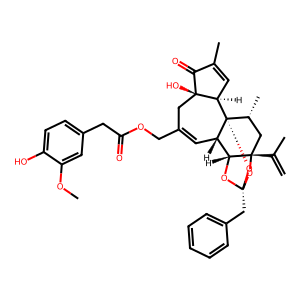

Known compounds and prediction of pChEMBL values:


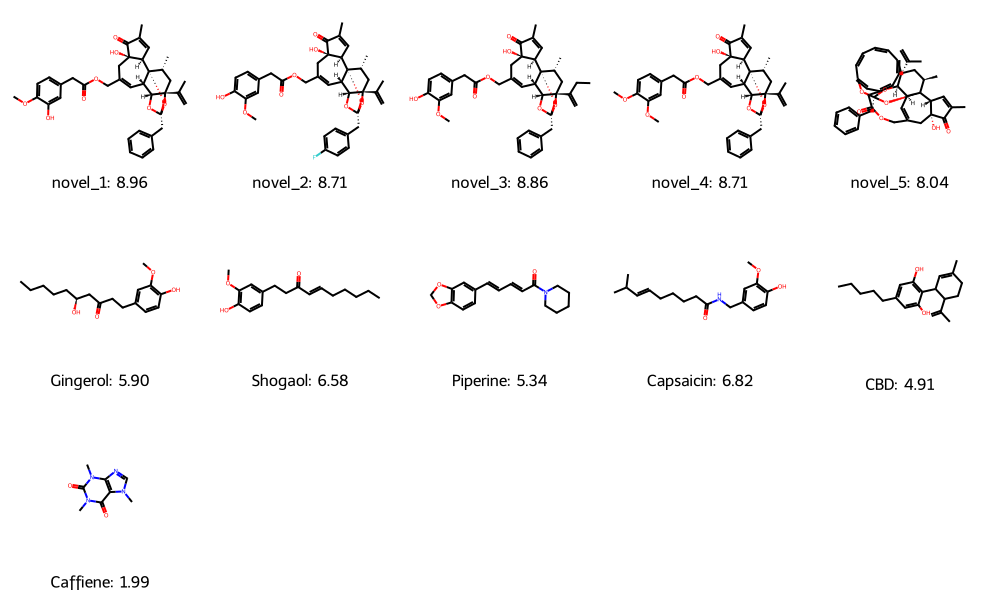

In [104]:
smiles_list = list(nov_mols_df['SMILES'])
name_list = list(nov_mols_df['compound_name'])
pred_list = list(nov_mols_df['pred'])

print("RTX")
display(rtx_img)

all_mols = [Chem.MolFromSmiles(s) for s in smiles_list]
all_legends = []
for name, pred in zip(name_list, pred_list):
    all_legends.append(f"{name}: {pred:.2f}")

print("Known compounds and prediction of pChEMBL values:")
Draw.MolsToGridImage(all_mols, molsPerRow=5, subImgSize=(200, 200), legends=all_legends)


# Let's talk about the caveats and future tasks for better progression in finding TRPV1 agonists.


A future project would be to use ChemTSV or Pytorch Molecule to generate more accurate compounds to predict with our model. Along with this, we will most likely have to optimize our model for greater accuracy which will be along the lines of:

* Gather more data for building model.
* Consider other factors beyond pChEMBL value as molecular properties also play a vital role in determining a drug's efficacy.
* Look into other frameworks for machine learning.
* Collaborate and learn more from others!